## Introduction to Deep Learning
Deep learning is subset of ML.
- AI > ML > DL
- AI tries to automate some process 
- Need? - to deal with uncertainities (example- use object detection)
- ML
    - Machine learning
    - solves problem where data is in structured format (excel, tabular)
    - example - prediction of sale
- DL
    - Deep Learning
    - solves problem where data is unstructured (images, video, audio, text) of variable sizes
    - extension of ml / solves more complex problem
    
- ANN
    - Supervised learning
        - output is already available, labels are present and we wil be training historical data
        - based on this model will learn
        - CV (Computer vision) - data is video or image file
            - has object classification, detection, tracking and image segmentation
        - NLP (Natural Language Procesing) - data is in text
        - has text generation, sentiment analysis, neural machine translation and attention mechanisms

    - Unsupervised learning
        - output is NOT KNOWN
        - Types
            - representation and generative learning
                - has autoencoders (tries to find out latent/hidden represetation of iput data) 
                - GANs (trains on data and produces data that is exactly similar to input data)
            - reinforcement learning

## Importance of Deep Learning
- High amount of data, weak performance of older learning algorithms, better performance by deep learning

## ANN v/s BNN
- ANN
    - Artificial Neural Network
    - are inspired from biological neurons found in cerebral cortex of our brain
    - are versatile, scalable and powerful (can tackle highly complex ML tasks
    
- BNN
    - Biological Neural Network
    - more neurons = deep neural network

- to fire the euron you should have the minimum threshold value

## Overview of Perceptron
- Perceptron is also known as LTU (linear threshold unit) & TLU(Threshold Logic Unit)
- input is binary (making tea->it will be good or bad)
- in dl, we have inputs, weights (w1, w2, w3), y hat = predicted value, y = actual value, f = decision/activation function
- moving in forward direction (make the tea good or bad) = forward pass
- once tea is made, make it better, back propagate - update the weights - back propagation
- preparation of 1 cycle = epoch
    - z = w1.x1 +w2.x2 + w3.x3
    - y hat = function (z)
        - y hat = 0, z<threshold
        - y hat = 1, z >= threshold
    - error = y - y hat
- based on error we will be back propagating
    - Perceptron Weight Update Rule: 
        - W_new = W_old + n.error.x
        - W_new = W_old + n(y-y hat).x
    - n(eta) = learning rate | x = input
    - learning rate is between 0 & 1 | at how much rate you want to update


## More about perceptron
- instead of keping theta as threshold, we can make it a learnable parameter
- bias = kind of constant that we provide in the eq.

## Implementation of Perceptron -1

- Creating the environment in cmd
    - conda create --prefix ./env python=3.7 -y
    - conda activate ./env
    - source activate ./env
    - touch requirements.txt
- requirements
    - matplotlib
    - seaborn
    - notebook
    - numpy 
    - joblib
    - pandas
- pip install -r requirements.txt

In [1]:
from IPython.display import Image

In [2]:
Image(url='https://miro.medium.com/v2/resize:fit:828/format:webp/1*gRkoNgQlliU5O6sUFpEuaA.png')

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import joblib
import pandas as pd
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")#optional

In [3]:
class Perceptron:
    #eta - Learning rate
    def __init__(self, eta: float = None, epochs: int= None):
        self.weights = np.random.randn(3) * 1e-4 #small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f'intial weights before training: \n {self.weights}')
        self.eta = eta
        self.epochs = epochs
            
    
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))] #c_ = for concatenation
        print(f"X with bias: \n {X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            Z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(Z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch+1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
    
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X),1))]
        Z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(Z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
            
    def save(self, filename, model_dir =None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        return joblib.load(filepath)

In [4]:
def prepare_data(df, target_col = "y"):
    X = df.drop(target_col, axis=1)
    
    y = df[target_col]
    
    return X,y

In [5]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y":  [0,0,0,1]
}

df_AND =pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [6]:
X, y = prepare_data(df_AND)

ETA = 0.1 # learning rate should be between 0-1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X,y)

_ = model_and.total_loss() # _  =dummy value / wont be used

intial weights before training: 
 [ 2.02981321e-05 -5.94517575e-05  7.58382583e-05]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.1000203   0.09994055 -0.09992416]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 2.02981321e-05 -5.94517575e-05  2.00075838e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[0.1000203  0.09994055 0.10007584]
####################
--------------------
for epoch >> 3
--------------------
pre

In [7]:
model_and.save(filename="and.model", model_dir="C:/Users/Arnav/Desktop/Data Analyst/INEURON/Untitled Folder/model")

In [8]:
reload_model_and = Perceptron().load(filepath="model/and.model")

In [9]:
reload_model_and.predict(X=[[1,1]]) # array[1] output =  successfully predicted

array([1])

In [10]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1]
}
df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [11]:
X, y = prepare_data(df_OR)

ETA = 0.1 # learning rate should be between 0-1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X,y)

_ = model_or.total_loss() # _  =dummy value / wont be used

intial weights before training: 
 [-8.26204670e-05  2.50118064e-05  6.50552475e-05]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.19991738  0.20002501 -0.29993494]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.19991738  0.20002501 -0.19993494]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.19991738  0.20002501 -0.09993494]
####################
--------------------
for epoch >> 3
--------------------
predicted va

In [12]:
model_or.save(filename="or.model",model_dir="C:/Users/Arnav/Desktop/Data Analyst/INEURON/Untitled Folder/model")

In [13]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0]
}
df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [14]:
X, y = prepare_data(df_XOR)

ETA = 0.1 # learning rate should be between 0-1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X,y)

_ = model_xor.total_loss() # _  =dummy value / wont be used

intial weights before training: 
 [-2.34599872e-05 -4.92644920e-05 -8.84732451e-05]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-0.10002346 -0.10004926  0.19991153]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[-2.34599872e-05 -4.92644920e-05 -8.84732451e-05]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[-0.10002346 -0.10004926  0.19991153]
####################
--------------------
for epoch >> 3
--------------------


- Perceptrons are valid on linearly separable datasets. (not on non-linear)

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def save_plot(df, model, filename="plot.png", plot_dir="C:/Users/Arnav/Desktop/Data Analyst/INEURON/Untitled Folder/plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values  # Convert to an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))
        
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
    
    X, y = prepare_data(df)  # You need to define the prepare_data function
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)


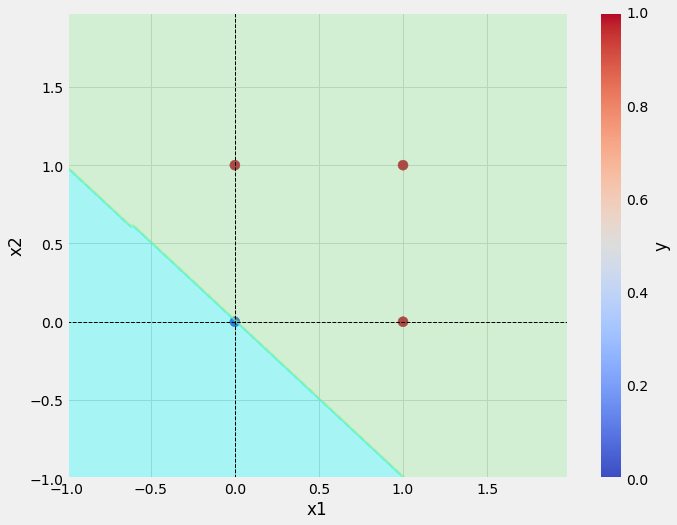

In [19]:
save_plot(df_OR, model_or, filename="or_plot.png", plot_dir="C:/Users/Arnav/Desktop/Data Analyst/INEURON/Untitled Folder/plots")

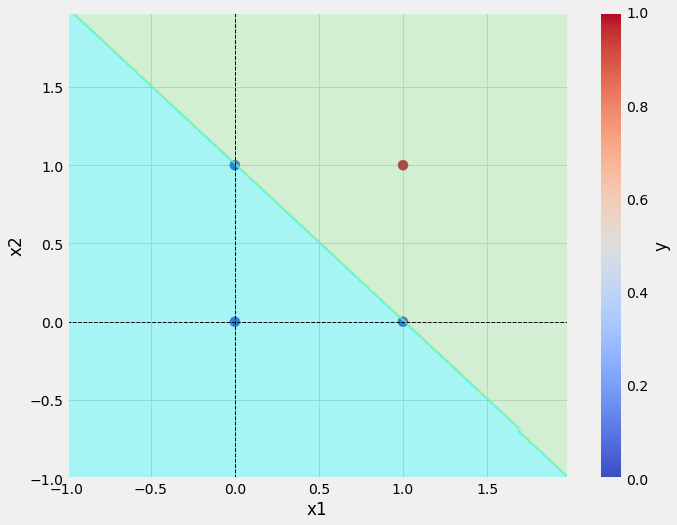

In [21]:
save_plot(df_AND, model_and, filename="and_plot.png", plot_dir="C:/Users/Arnav/Desktop/Data Analyst/INEURON/Untitled Folder/plots")

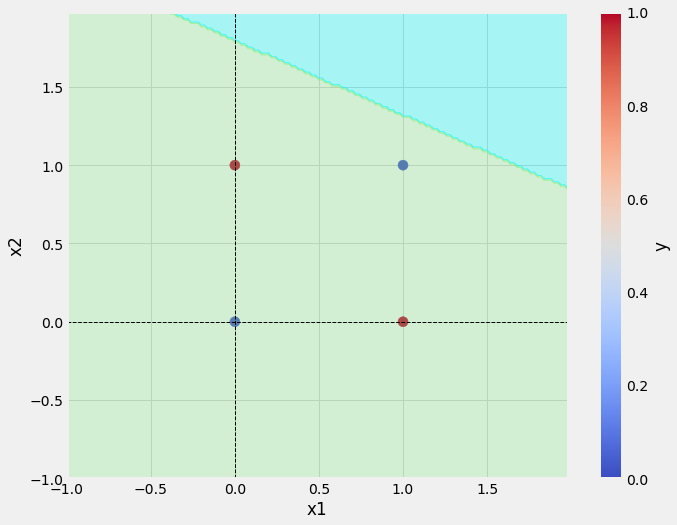

In [22]:
save_plot(df_XOR, model_xor, filename="xor_plot.png", plot_dir="C:/Users/Arnav/Desktop/Data Analyst/INEURON/Untitled Folder/plots")

## Python Scripting and Modular coding for Perceptron

https://github.com/c17hawke/Python-scripting---Modular-coding-for-PERCEPTRON/tree/main

- git init >> initialise the exmpty git repo
- touch .gitignore
- touch README.md
- conda create --prefix ./env python=3.10 -y
- copy the requirements
- conda activate ./env
- pip install -r requirements.txt
- mkdir Research_notebooks
- mv Deep_Learning.ipynb Research_notebooks
- mkdir utils
- touch __init__.py #required packages
- mv __init__.py utils
- Make all the commits(readme, utils,...)
- touch or.py
- touch utils/all_utils.py
- touch utils/model.py
-  python or.py
- cp or.py and.py
- from utils.all_utils import prepare_data 
- help(prepare_data)

## Flow:

- Created a utility folder
    -  __init__(to define utils as package) #from utils.all_utils import ....
    - all_utils (all helper functions)
    - model.py (all model related code)
- or.py
-and.py